<a href="https://colab.research.google.com/github/HeadOutii/AIRepair/blob/main/CNN1.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy pandas matplotlib opencv-python kaggle

In [ ]:
import kagglehub
import os
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [ ]:
path = kagglehub.dataset_download("bharatadhikari/humanface8000")
print("Path to dataset files:", path)
image_folder = os.path.join(path, 'landscape Images/gray')
mask_folder = os.path.join(path, 'landscape Images/color')

Path to dataset files: /root/.cache/kagglehub/datasets/bharatadhikari/humanface8000/versions/1


In [ ]:
def load_images(folder, num_images):
    images = []
    for filename in os.listdir(folder)[:num_images]:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))  # Изменяем размер изображений
        images.append(img)
    return np.array(images)

In [ ]:
num_images = 8000
gray_images = load_images(image_folder, num_images)
color_images = load_images(mask_folder, num_images)

In [ ]:
gray_images = gray_images.astype('float32') / 255.0
color_images = color_images.astype('float32') / 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(gray_images, color_images, test_size=0.2, random_state=42)

In [ ]:
def create_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(64, 64, 3)))  # Уменьшите размер входа
    model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))  # Уменьшите количество фильтров
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64 * 64 * 3, activation='sigmoid'))  # Уменьшите размер выходного слоя
    model.add(layers.Reshape((64, 64, 3)))  # Измените форму обратно в изображение
    return model

model = create_model()
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=8, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/8


KeyboardInterrupt: 

In [ ]:
model.save('image_restoration_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


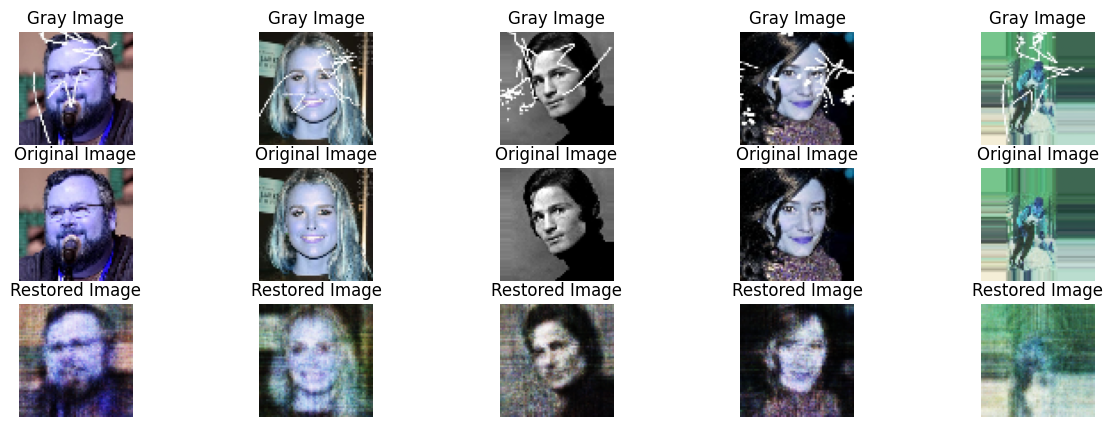

In [ ]:
# Визуализация результатов
def visualize_results(X_test, y_test, model, num_images=5):
    preds = model.predict(X_test[:num_images])

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(X_test[i])
        plt.title("Gray Image")
        plt.axis('off')

        plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(y_test[i])
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(preds[i])
        plt.title("Restored Image")
        plt.axis('off')

    plt.show()

visualize_results(X_test, y_test, model)
